In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import os

In [17]:
working_dir = os.getcwd()

# Load data
train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X_train = train_data[['WS10']].values.reshape(-1,1)
y_train = train_data[['POWER']].values

# Normalize data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
402/402 [==============================] - 0s 648us/step - loss: 0.0496 - root_mean_squared_error: 0.2228
Epoch 2/100
402/402 [==============================] - 0s 601us/step - loss: 0.0495 - root_mean_squared_error: 0.2226
Epoch 3/100
402/402 [==============================] - 0s 585us/step - loss: 0.0496 - root_mean_squared_error: 0.2227
Epoch 4/100
402/402 [==============================] - 0s 594us/step - loss: 0.0496 - root_mean_squared_error: 0.2227
Epoch 5/100
402/402 [==============================] - 0s 581us/step - loss: 0.0496 - root_mean_squared_error: 0.2226
Epoch 6/100
402/402 [==============================] - 0s 589us/step - loss: 0.0496 - root_mean_squared_error: 0.2227
Epoch 7/100
  1/402 [..............................] - ETA: 0s - loss: 0.0412 - root_mean_squared_error: 0.2030

KeyboardInterrupt: 

In [21]:
weather_forecast_input = pd.read_csv(f'{working_dir}/../data/WeatherForecastInput.csv')
X_test = scaler.transform(weather_forecast_input[['WS10']].values)
y_pred = model.predict(X_test)

23/23 [==============================] - 0s 486us/step


In [22]:
solution = pd.read_csv(f'{working_dir}/../data/Solution.csv')
y_true = solution[['POWER']].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

RMSE: 0.21489179638445877


In [23]:
forecast_template = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template['FORECAST'] = y_pred
forecast_template.to_csv(f'{working_dir}/results/ForecastTemplate1-NN.csv', index=False)

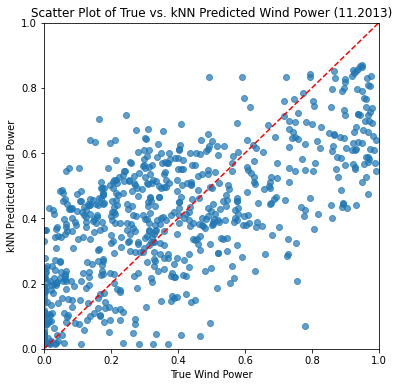

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('True Wind Power')
plt.ylabel('kNN Predicted Wind Power')
plt.title('Scatter Plot of True vs. kNN Predicted Wind Power (11.2013)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

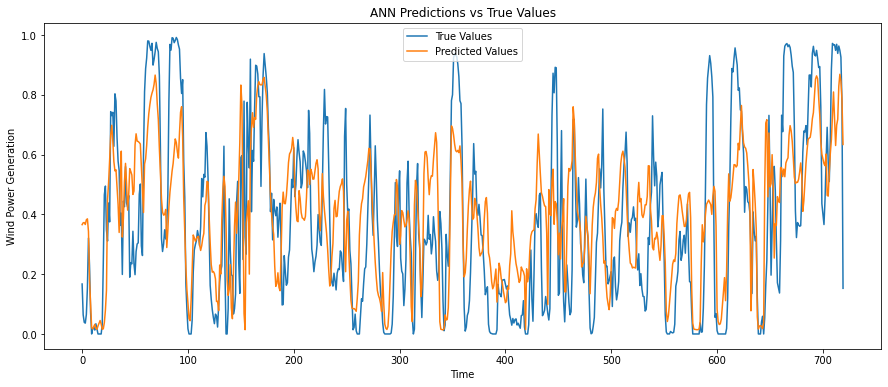

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Wind Power Generation')
plt.title('ANN Predictions vs True Values')
plt.legend()
plt.show()